# Biodiversity in National Parks 

## Project Goals
The goal of this project is to analyze data from National Park Service about various species around different national park locations. 
This project will analyze, prepare, plot data and try to explain the findings of the analysis. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks.
Here are a few questions that this project is trying to answer:

 - What category of species is the most likely to be endangered?
 - Which category of species is the most observed?
 - What animal is the most common and what is their distribution amongst parks?

**Data Sources:**

The Data `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Import Python Modules 
Import the modules that will be used for this project:

In [31]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


## Loading the data
To perform analysation, we wil load the datasets into `DataFrames`. Once loaded into `DataFrames`, we can use Python to analyze and visualize the data. In the next steps, `species_info.csv` and `observations.csv` are read as `DataFrames` called `species` and `observations` respectively. Then the new `DataFrames` are glimpsed with the `head()` function.

## Species 
The Species `DataFrame` consists of 4 columns:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **commnon_names** - The common name of each species
- **conservation_status** - The conservation statues of each species


In [32]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Observations
The Observations `DataFrame`consists of 4 columns:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the park
- **observations** - The amount of observations done of the animal in the past 7 days.

In [33]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Explore the Data
First we will take a look at the dimensions of the datasets. `Species` has 5824 rows and 4 columns and `observations` has 23296 rows and 3 columns. 

In [34]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


Time to see how many unique species are in the dataset. The amount of unique species we have is **5541**. There are a lot of unique species in these national parks. 

In [35]:
print(f"Unique species: {species.scientific_name.nunique()}")

Unique species: 5541


Next is to find out how many categories of species there are. There are **7** unique categories including plants and animals.

In [36]:
print(f"Number of unique categories:{species.category.nunique()}")
print(f"The names of the unique categories: {species.category.unique()}")


Number of unique categories:7
The names of the unique categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We can dig even deeper to see the counts of the `category` column. We can see that `Vascular Plant` has the most entries with **4470** and `Reptile` has the fewest entries with **79**


In [37]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Let's take a look at the `conservation_status`. There are **4** unique conservation statuses and they are `NAN`, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`

In [38]:
print(f"Number of unqiue conservation statuses: {species.conservation_status.nunique()}")
print(f"The names of the unique conservation statues: {species.conservation_status.unique()}")

Number of unqiue conservation statuses: 4
The names of the unique conservation statues: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next thing we will see the count of `conservation_status`.There are **5633** `NAN`values, which just means that they are species without concern. On the other hand there **16** Endangered, **4** In Recovery, **161** Species of Concern and **10** Threatened species.

Note: In most cases `NAN` values should be treated carefully but in this `DataFrame` it just means that the species aren't under any conservation status.


In [39]:
print(f"NAN values:{species.conservation_status.isna().sum()}")
species.groupby('conservation_status').size()

NAN values:5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Let's take a look at the `park_name` column in `observations`. There are **4** unique parks where the observations happened. The parks being `Great Smoky Mountains National Park`, `Yosemite National Park`, `Brye National Park` and `Yellowstone National Park`. Because we know that the **4** Parks are all National Parks, we should get rid of National Park from the end of each string, so it's easier to plot onto graphs in the future.

In [40]:
print(f"Number of unqiue parks: {observations.park_name.nunique()}")
print(f"The names of the pakrs: {observations.park_name.unique()}")
observations['park_name']= observations['park_name'].str.replace('National Park', '', regex=True)

Number of unqiue parks: 4
The names of the pakrs: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


And finally let's take look at the amount of `observations` that they have done in the last 7 days. The sum amount of `observations` done is **3 314 739**. That is a lot of observations, lots of data to analyze. 

In [41]:
print(f"The Sum of observations done in the last 7 days: {observations.observations.sum()}")

The Sum of observations done in the last 7 days: 3314739


## Analysis
This section will start analyzing the data after the initial exploration. The first task is to clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [42]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the `conservation_status` for each `category` in `species`, except the ones that need no intervations. There is both a table and a chart below to explore below.

We can see that the category with most species is `Species of Concern`, with **72** Birds and **43** Vascular Plants. In the `Endangered` status there is **4** Birds and **7** Mammals. In `Recovery` status there is **4** Birds and **1** Mammal, which could mean that birds are more likely to recover.

In [43]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()\
    .fillna(0)
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,1.0,0.0,0.0,0.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,0.0,4.0,2.0,0.0,0.0,2.0


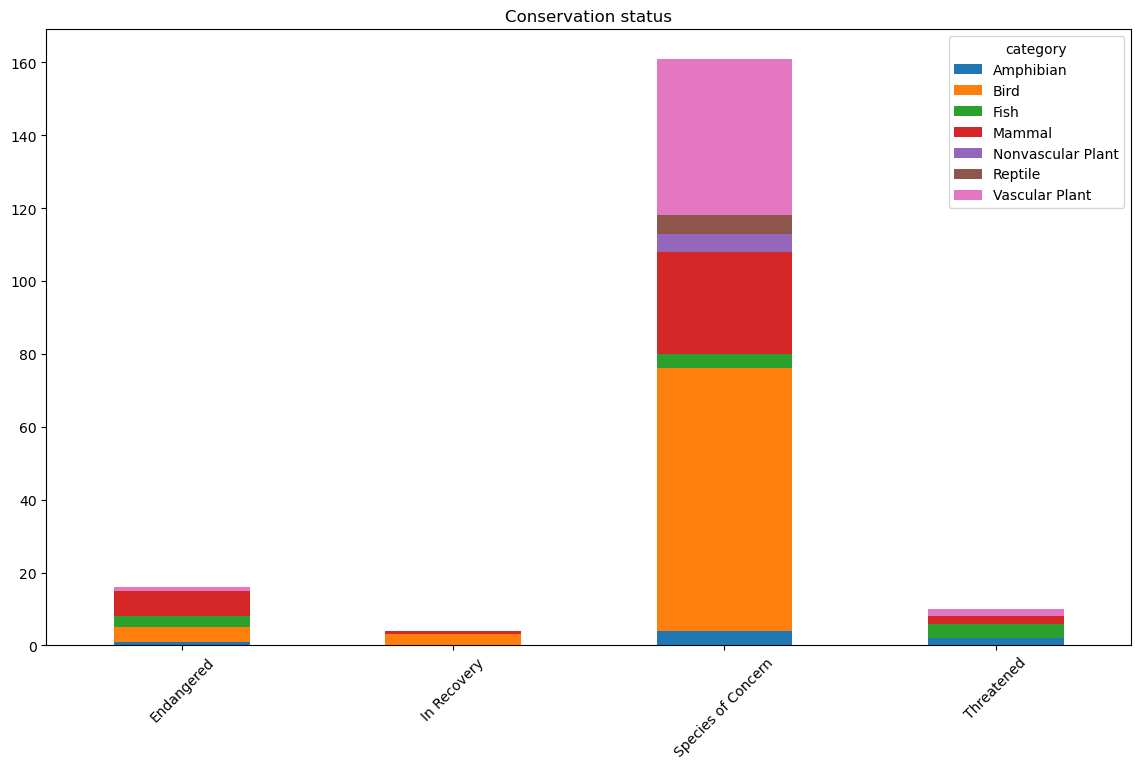

In [44]:
conservationCategory.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Conservation status')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

To have a better understanding if one species is more likely to be endangered or not, is to make a new column called `protected` and then count the species that are protected and not protected. In the pivot table we can see that the absolute number of protected species is highest for **Vascular Plant**, **Bird** and **Mammal**

In [45]:
species['protected']= species.conservation_status != "No Intervention"

In [46]:
category_counts = species.groupby(['category', 'protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


However absolute numbers aren't always optimal, so we can add one more column where we calculate the % of species that is protected. We can see that **~17% Mammals** are protected and **~15% Birds** are protected, but only **~1% Vascular Plants** are protected.

In [47]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Next thing to checkout is what species gets observed the most. For that we will be merging `species` and `observations` together and call it `df`. Now that the 2 `DataFrames` are merged we can easily make a graph to see what `category` of species gets observed the most often. **Vascular Plant** gets observed the most. 

In [48]:
df = pd.merge(observations, species, on='scientific_name', how = 'inner')
print(df.head())

            scientific_name               park_name  observations  \
0        Vicia benghalensis  Great Smoky Mountains             68   
1            Neovison vison  Great Smoky Mountains             77   
2         Prunus subcordata               Yosemite            138   
3      Abutilon theophrasti                  Bryce             84   
4  Githopsis specularioides  Great Smoky Mountains             85   

         category                        common_names conservation_status  \
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No Intervention   
1          Mammal                       American Mink     No Intervention   
2  Vascular Plant                        Klamath Plum     No Intervention   
3  Vascular Plant                          Velvetleaf     No Intervention   
4  Vascular Plant                      Common Bluecup     No Intervention   

   protected  
0      False  
1      False  
2      False  
3      False  
4      False  


In [49]:
spec_cat =df.groupby('category')['observations'].sum().reset_index
spec_cat

<bound method Series.reset_index of category
Amphibian              45068
Bird                  332371
Fish                   72901
Mammal                163120
Nonvascular Plant     190653
Reptile                45822
Vascular Plant       2795312
Name: observations, dtype: int64>

Wanted to see which park has the most observations, and **Yellowstone** has the most and **Bryce** has the least observations.

In [50]:
obs_park = df.groupby('park_name')['observations'].sum().reset_index
obs_park

<bound method Series.reset_index of park_name
Bryce                      633291
Great Smoky Mountains      474863
Yellowstone               1587641
Yosemite                   949452
Name: observations, dtype: int64>

### Species in Park

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [51]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [52]:
cleanRows = [] #The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [53]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows)) #into one list so it's easier to read
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now we are able to count the number of occurances of each word. It seems that `Bat` came up **23** times and `Shrew` came up **18** times.

In [61]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
66,Bat,23
3,Shrew,18
118,Myotis,17
187,Mouse,16
159,Chipmunk,13
86,Squirrel,12
22,American,12
20,Eastern,11
68,Vole,11
104,Western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [55]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [56]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [57]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,is_bat
0,Lasiurus blossevillii,Bryce,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

In [58]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce,3433
1,Great Smoky Mountains,2411
2,Yellowstone,8362
3,Yosemite,4786


Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [59]:
obs_by_park = bat_observations.groupby(['park_name', 'protected']).observations.sum().reset_index()
obs_by_park

,park_name,protected,observations
0,Bryce,False,1596
1,Bryce,True,1837
2,Great Smoky Mountains,False,1299
3,Great Smoky Mountains,True,1112
4,Yellowstone,False,4044
5,Yellowstone,True,4318
6,Yosemite,False,2345
7,Yosemite,True,2441


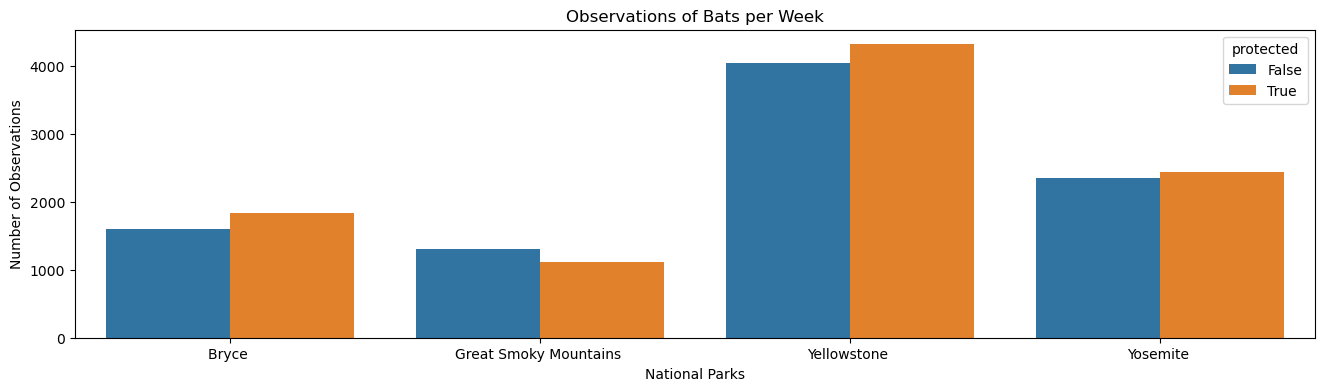

In [60]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusion

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:
 - What category of species is the most likely to be endangered?
    - `Mammal` is the most likely animal to be endangered and also the most likely animal to be under protection, with `Birds`being runner ups.
 - Which category of species is the most observed?
    - The `category` of species that is most observed is **Vascular Plant** with **Birds** being runner ups again.
 -  What animal is the most common and what is their distribution amongst parks?
    - The most common animal is `Bat` and they have been observed the most in `Yellowstone` and the least in `Great Smoky Mountains`. 

## Further Research

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered.

### Self evaluation

After finishing this project, I would give myself maybe a 4-5 points out of 10 for this project. I would say I got a lot of help from other people who have already done this project and a lot of code is from them. I didn't have many ideas for this project myself and I didn't think much out of the box so I feel like this is a weaker project of mine. I think if I was more interested in the data, I would have focused on it more. I am somewhat proud of what I wrote here but I also took a lot of inspiration from other's work. I can come back to this and see what I did and understand what I did but it's just not that beautiful as I wish it was. I'd say I learned quite a bit on this project and hopefully I will be better at my next project. The biggest issue I had and didn't do is cleaning the data fully, as I assumed that they gave me a clean dataset. 
**TL:DR - Had too much insipiration from other students, didn't work fully alone on this 4/5**